In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

cuda:0


In [11]:
from scipy.io import loadmat
m=loadmat('c:/work/teaching/machine learning/data/data_clust')
m.keys()
x=torch.tensor(m['x']).float()
y=torch.tensor(m['y']).long().squeeze()
C=torch.max(y).item()+1
print(x.shape,y.shape)

torch.Size([13000, 640]) torch.Size([13000])


In [90]:
mx=torch.mean(x,dim=0)
X=x-mx
u,d,vt=torch.linalg.svd(X)
print(vt[0:10,:])

tensor([[-0.0169,  0.0367, -0.0632,  ..., -0.0614,  0.0240, -0.0467],
        [ 0.0435, -0.0596,  0.0356,  ...,  0.0113, -0.0946, -0.0486],
        [ 0.0227,  0.0649,  0.0464,  ...,  0.0200,  0.0062, -0.0197],
        ...,
        [-0.0512,  0.0352, -0.0615,  ...,  0.0366,  0.0561, -0.0188],
        [ 0.0078,  0.0458,  0.0166,  ...,  0.0346, -0.0115,  0.0176],
        [-0.0138,  0.0613,  0.0264,  ..., -0.0208,  0.0025,  0.0044]])


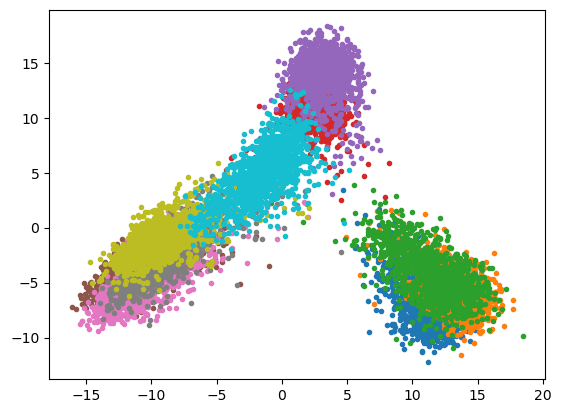

In [95]:
P=vt[0:2,:]
c=X@P.t()
for i in range(C):
    plt.plot(c[y==i,0],c[y==i,1],'.')

In [18]:
def eminit(x,C):
    j=torch.randint(x.shape[0],(1,1))[0,0]
    xj=x[j,:]
    S=[j.item()]
    d=torch.sum((x-xj)**2,1)
    for i in range(C-1):
        j=torch.argmax(d).item()
        S.append(j)
        xj=x[j,:]
        d1=torch.sum((x-xj)**2,1)
        d[d1<d]=d1[d1<d]
    return S
print(x[S,:].shape)

torch.Size([10, 640])


0.7048461538461539 0.666231266216726


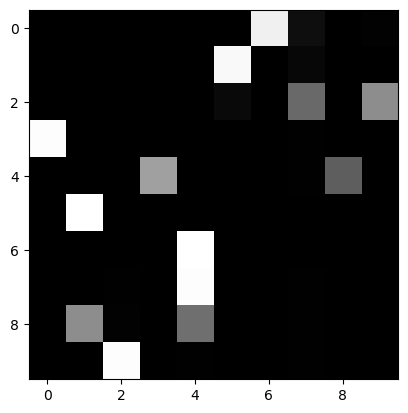

0.4696923076923077 0.4329861864237855


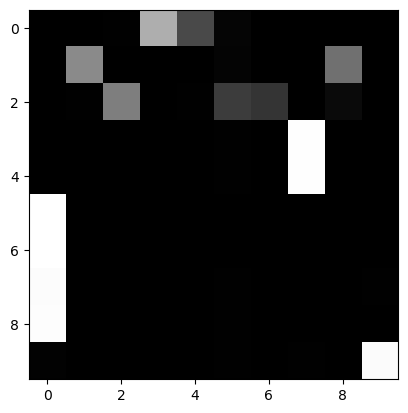

0.4745384615384615 0.4721526921003591


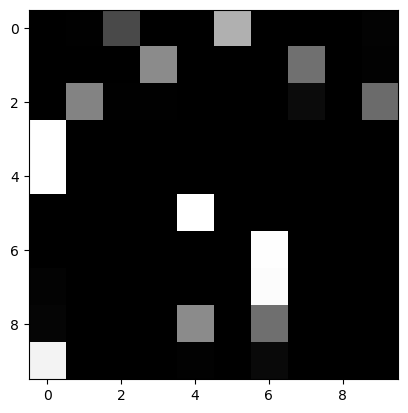

0.5727692307692308 0.47915634651405237


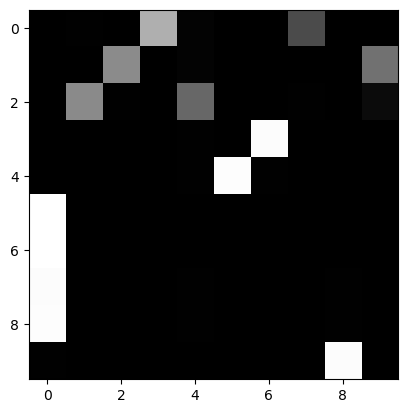

0.47315384615384615 0.43851544809045356


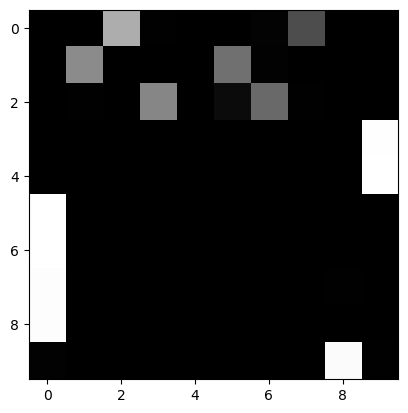

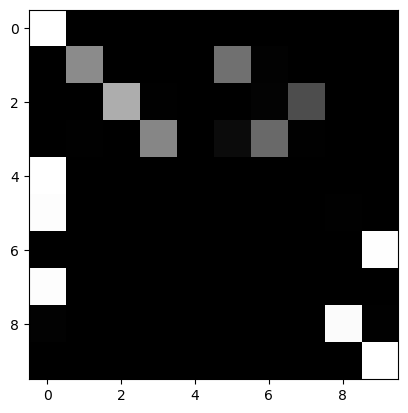

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import adjusted_rand_score
accs=[]
ars=[]
for it in range(5):
    S=eminit(x,C)
    km = KMeans(n_clusters=C, n_init=1,init=x[S,:]).fit(x.numpy())
    cm=contingency_matrix(y.numpy(),km.labels_)
    i,j=linear_sum_assignment(cm,maximize=True)
    cm1=contingency_matrix(j[y.numpy()],km.labels_)
    acc=np.sum(np.diag(cm1))/x.shape[0]
    ar=adjusted_rand_score(y.numpy(),km.labels_)
    accs.append(acc)
    ars.append(ar)
    print(acc,ar)
    plt.imshow(cm,cmap='gray')
    plt.show()
    plt.imshow(cm1,cmap='gray')

In [20]:
print(np.mean(accs),np.mean(ars))

0.5389999999999999 0.4978083878690753


In [56]:
x = np.loadtxt("c:/work/teaching/machine learning/data/hmm_pb1.csv", delimiter=',')
x = torch.tensor(x).long()-1
print(x)

tensor([0, 1, 4, 4, 0, 2, 5, 2, 1, 2, 5, 5, 0, 2, 2, 1, 2, 3, 2, 0, 1, 1, 3, 1,
        4, 5, 2, 1, 0, 4, 4, 1, 1, 4, 2, 3, 0, 5, 5, 0, 4, 4, 1, 5, 1, 0, 0, 2,
        5, 0, 3, 2, 0, 1, 1, 5, 2, 2, 0, 1, 0, 5, 3, 2, 1, 2, 0, 0, 4, 0, 1, 3,
        0, 2, 1, 5, 0, 5, 5, 0, 5, 5, 4, 3, 5, 4, 1, 2, 2, 0, 4, 5, 1, 5, 2, 5,
        5, 2, 2, 2, 5, 5, 5, 5, 4, 0, 1, 5, 5, 5, 1, 5, 5, 5, 2, 4, 1, 5, 2, 5,
        1, 5, 5, 0, 2, 0, 0, 3, 4, 5, 1, 2, 0, 2, 5, 1, 5, 5, 2, 4, 3, 4, 5, 2,
        2, 1, 5, 1, 5, 2, 2, 1, 4, 2, 5, 4, 2, 4, 1, 0, 2, 5, 1, 4, 4, 0, 5, 5,
        5, 5, 0, 4, 1, 3, 5, 0, 1, 3, 2, 0, 2, 2, 0, 1, 1, 5, 5, 5, 4, 3, 2, 2,
        2, 5, 2, 1, 1, 2, 0, 3, 4, 4, 1, 4, 3, 2, 0, 5, 0, 1, 5, 3, 1, 5, 5, 2,
        0, 1, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 3, 3, 5, 5, 1, 1, 5, 5, 2, 5, 5, 1, 4, 5, 2, 5, 3, 3, 5, 5, 5, 5, 1,
        3, 5, 1, 5, 5, 5, 5, 5, 5, 3, 2])


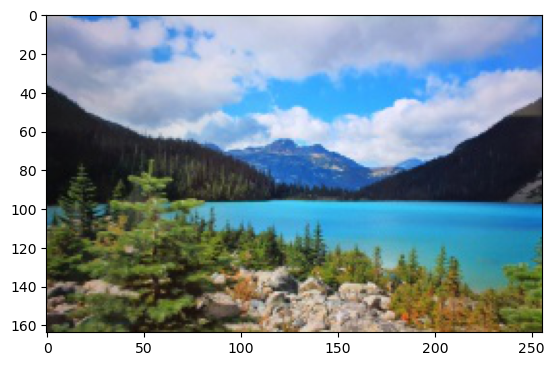

In [10]:
import imageio.v3 as iio
im = iio.imread('C:\\Work\\Teaching\\Machine Learning\\Data\scene256.jpg')
im=im.astype(float)/256
plt.imshow(im)